In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [15]:
# Read the data
df = pd.read_csv('/Users/Administrator/Documents/messibetis.csv')

In [14]:
df

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38
5,messi,47,42,73,25,Pass,Successful,70,54
6,messi,49,47,75,43,Pass,Unsuccessful,82,38
7,messi,50,10,79,31,Pass,Successful,87,24
8,messi,50,17,82,52,Pass,Successful,93,68
9,messi,50,24,98,62,Pass,Unsuccessful,98,61


In [18]:
# Convert the data to match the mplsoccer statsbomb pitch
df ['x'] = df['x']*1.2
df ['y'] = df['y']*.8
df ['endX'] = df['endX']*1.2
df ['endY'] = df['endY']*.8

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Messi pass and heat map vs Real Betis')

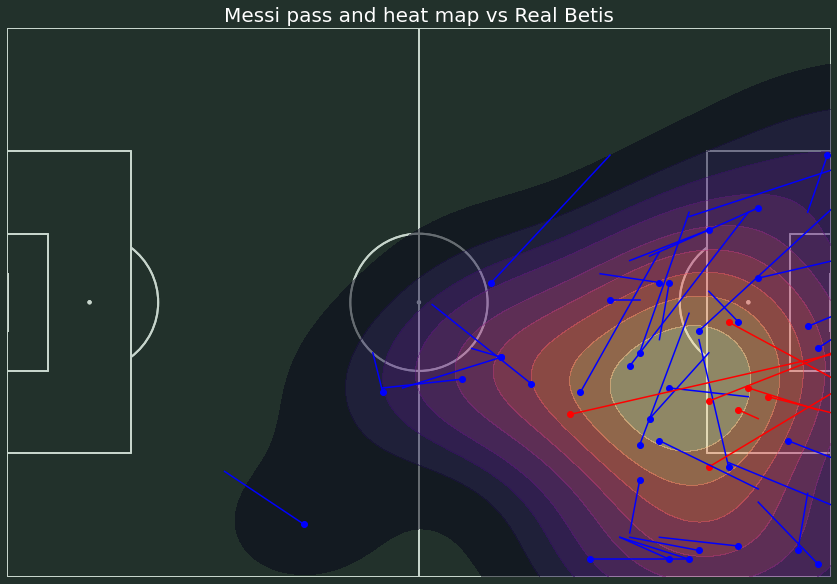

In [43]:
#fig,ax = plt.subplots(figsize=(13.5,8))
#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')

# This is how I create the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13, 8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# Create the Heatmap
kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest = False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)


# Use a for loop to plot each pass
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='blue')
        plt.scatter(df['x'][x],df['y'][x],color='blue')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')
          
# Details        
plt.xlim(0,120)
plt.ylim(0,80)

plt.title('Messi pass and heat map vs Real Betis',color='white',size=20)